In [1]:
# Importing all usefull libraries for this notebook
import numpy as np
import matplotlib.pyplot as plt

### Simple example for the cross correlation coeffiecient

In [2]:
# Defines number of points
n = 200
# Define the three vectors along all directions
x = np.linspace(-1500, 1500, n)
y = x
z = -10.
# Creates the grid
X, Y = np.meshgrid(x, y)

In [6]:
# Define the elements of the prims for gravity and magnetic computation
#modelgrav = (-250., 250., -250., 250., 100., 400., 1000)
modelmag = (-400., 400., -400., 400., 200., 600., 1.0)
field = (55., -22.)
source = (field[0] + 90., field[1] + 90.)
#source = [33., 25.]

# Direction obtained by difference between regional field and source
diff = (-field[0] + source[0], - field[1] + source[1])

In [7]:
print 'Field:', field
print 'Source:', source
print 'Difference:', diff

(55.0, -22.0)
(145.0, 68.0)
(90.0, 90.0)


### Computing: (i) gravity anomaly; (ii) total field anomaly; (iii) total field anomaly in magnetic pole; and (iv) reduction to pole.

In [8]:
from codes.prism import prism_tf

In [9]:
# Calculate the total field anomaly
tf_rem = prism_tf(X, Y, z, modelmag, source, field)
tf_ind = prism_tf(X, Y, z, modelmag, field, field)
# Running a residual total field anomaly in order to compare the 
# residual and the anomaly through difference directions
tf_res = prism_tf(X, Y, z, modelmag, diff, field)

In [10]:
# Residual 
res = tf_rem - tf_ind

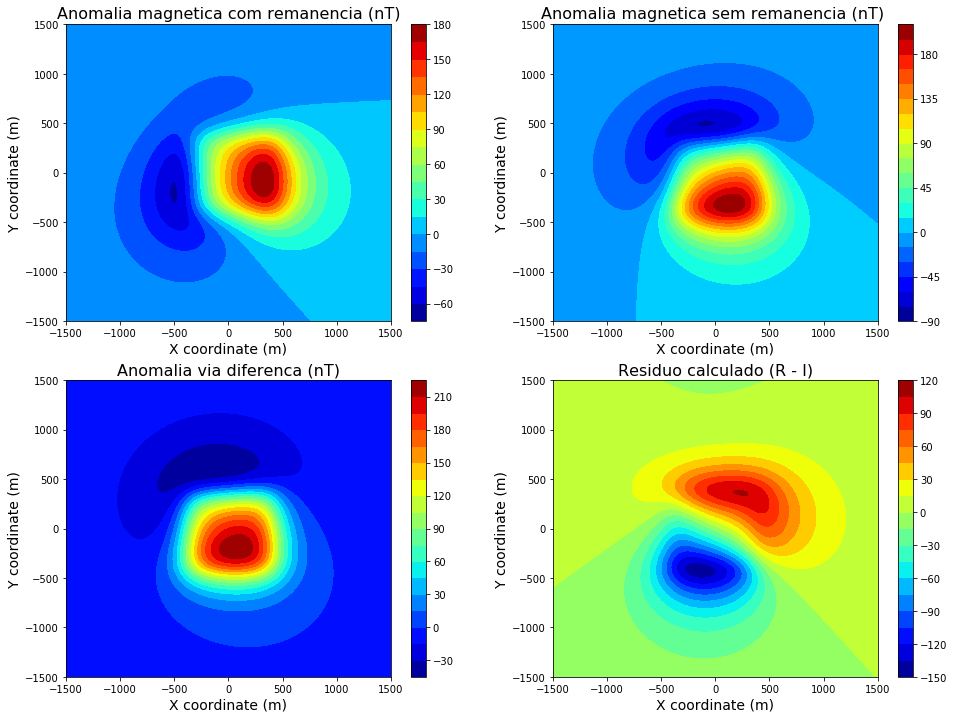

In [11]:
plt.close('all')
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.contourf(Y, X, tf_rem, 20, cmap = plt.cm.jet)
plt.title('Anomalia magnetica com remanencia (nT)', fontsize = 16)
plt.xlabel('X coordinate (m)', fontsize = 14)
plt.ylabel('Y coordinate (m)', fontsize = 14)
plt.colorbar()

plt.subplot(2, 2, 2)
plt.contourf(Y, X, tf_ind, 20, cmap = plt.cm.jet)
plt.title('Anomalia magnetica sem remanencia (nT) ', fontsize = 16)
plt.xlabel('X coordinate (m)', fontsize = 14)
plt.ylabel('Y coordinate (m)', fontsize = 14)
plt.colorbar()

plt.subplot(2, 2, 3)
plt.contourf(Y, X, tf_res, 20, cmap = plt.cm.jet)
plt.title('Anomalia via diferenca (nT)', fontsize = 16)
plt.xlabel('X coordinate (m)', fontsize = 14)
plt.ylabel('Y coordinate (m)', fontsize = 14)
plt.colorbar()

plt.subplot(2, 2, 4)
plt.contourf(Y, X, res, 20, cmap = plt.cm.jet)
plt.title('Residuo calculado (R - I)', fontsize = 16)
plt.xlabel('X coordinate (m)', fontsize = 14)
plt.ylabel('Y coordinate (m)', fontsize = 14)
plt.colorbar()


plt.show()

### Importing all potential funcions and transforms

In [12]:
from codes.filtering import reduction, pseudograv
from codes.derivative import totalgrad, zderiv

### Computing the correlation coefficient by using a grid for inclination and declination values

In [15]:
# Create the intervals for inclination and declination
inc = np.arange(20., 160., 1.)
dec = np.arange(-90., 90., 1.)

ni, nd = inc.size, dec.size
# Create the grid
Dec, Inc = np.meshgrid(dec, inc)

# Create the array to allocate the result
res_rem = np.zeros([ni, nd])
res_ind = np.zeros([ni, nd])

In [16]:
from codes.statistical import cccoef
from codes.statistical import analysis

In [17]:
# Computing all result
for j in range(nd):
    for i in range(ni):    
        rtp_rem = reduction(x, y, tf_rem, field, (inc[i], dec[j]), (90., 0.), (90., 0.))
        tga_rem = totalgrad(x, y, rtp_rem)
        vga_rem = zderiv(x, y, rtp_rem, 1.)
        res_rem[i,j] = cccoef(tga_rem, vga_rem)

codes/auxiliars.py:190: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


In [19]:
# Computing all result
for j in range(nd):
    for i in range(ni):    
        rtp_ind = reduction(x, y, tf_ind, field, (inc[i], dec[j]), (90., 0.), (90., 0.))
        tga_ind = totalgrad(x, y, rtp_ind)
        vga_ind = zderiv(x, y, rtp_ind, 1.)
        res_ind[i,j] = cccoef(tga_ind, vga_ind)

In [20]:
print 'Cross correlation (Remanent magnetization)'
_ = analysis(res_rem)
print 'Cross correlation (Induced magnetization)'
_ = analysis(res_ind)

Cross correlation (Remanent magnetization)
Minimum:    0.2625
Maximum:    0.6703
Mean value: 0.4866
Variation:  0.4078
Cross correlation (Induced magnetization)
Minimum:    0.3759
Maximum:    0.6766
Mean value: 0.5877
Variation:  0.3007


In [21]:
# Setting index values from maximum and minimum correlation
imax1, jmax1 = np.where(res_rem == res_rem.max())
imin1, jmin1 = np.where(res_rem == res_rem.min())
cc_incr = Inc[imax1, jmax1]
cc_decr = Dec[imax1, jmax1]
print 'Direcao para maxima e minima correlacao:'
print 'Inclination:', cc_incr
print 'Declination:', cc_decr

Direcao para maxima e minima correlacao:
Inclination: [ 148.]
Declination: [ 71.]


In [22]:
# Setting index values from maximum and minimum correlation
imax2, jmax2 = np.where(res_ind == res_ind.max())
imin2, jmin2 = np.where(res_ind == res_ind.min())
cc_inci = Inc[imax2, jmax2]
cc_deci = Dec[imax2, jmax2]
print 'Direcao para maxima e minima correlacao:'
print 'Inclination:', cc_inci
print 'Declination:', cc_deci

Direcao para maxima e minima correlacao:
Inclination: [ 54.]
Declination: [-16.]


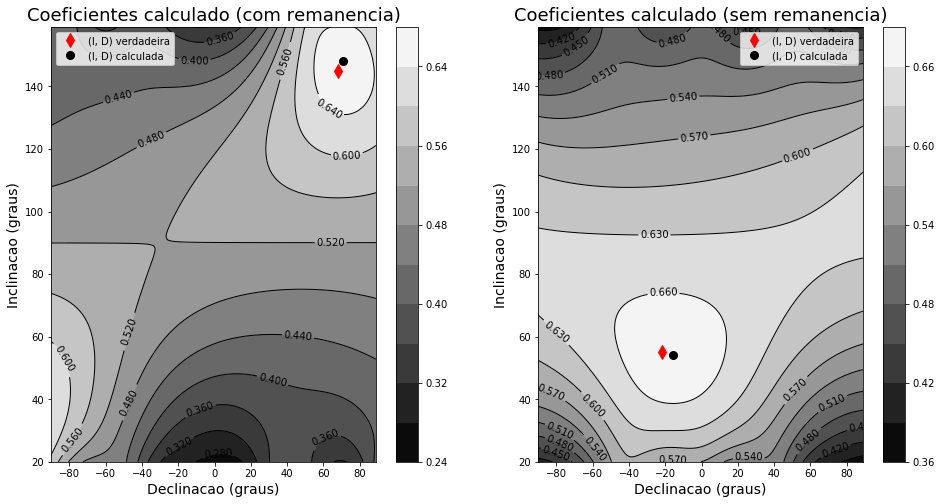

In [44]:
# Plotting the first result
plt.close('all')
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plot1 = plt.contour(Dec, Inc, res_rem, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec, Inc, res_rem, 10, cmap = plt.cm.gray)
plt.plot(source[1], source[0], 'rd', markersize = 10, label = '(I, D) verdadeira')
plt.plot(cc_decr, cc_incr, 'ko', markersize = 8, label = '(I, D) calculada')
plt.clabel(plot1, fontsize = 10)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Coeficientes calculado (com remanencia)', fontsize = 18)
plt.xlabel('Declinacao (graus)', fontsize = 14)
plt.ylabel('Inclinacao (graus)', fontsize = 14)
plt.colorbar()
plt.legend(loc = 'best')

plt.subplot(1, 2, 2)
plot2 = plt.contour(Dec, Inc, res_ind, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec, Inc, res_ind, 10, cmap = plt.cm.gray)
plt.plot(field[1], field[0], 'rd', markersize = 10, label = '(I, D) verdadeira')
plt.plot(cc_deci, cc_inci, 'ko', markersize = 8, label = '(I, D) calculada')
plt.clabel(plot2, fontsize = 10)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Coeficientes calculado (sem remanencia)', fontsize = 18)
plt.xlabel('Declinacao (graus)', fontsize = 14)
plt.ylabel('Inclinacao (graus)', fontsize = 14)
plt.colorbar()
plt.legend(loc = 'best')

#plt.savefig('figures/tga_vg_plus90.png', dpi = 300)#, transparent = True)

plt.show()